In [1]:
import numpy as np
import pandas as pd
#read loan.csv file from loan_doc folder
##provide path according to your system
loan_df = pd.read_csv('\loan_doc\loan.csv')
#read first 10 record in table
print(loan_df.head(10))
loan_df.shape

        id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   
5  1075269    1311441       5000         5000           5000.0   36 months   
6  1069639    1304742       7000         7000           7000.0   60 months   
7  1072053    1288686       3000         3000           3000.0   36 months   
8  1071795    1306957       5600         5600           5600.0   60 months   
9  1071570    1306721       5375         5375           5350.0   60 months   

  int_rate  installment grade sub_grade  ... num_tl_90g_dpd_24m  \
0   10.65%       162.87     B        B2  ...                NaN   
1   15.

C:\Users\errav\AppData\Local\Temp\ipykernel_10460\3074752687.py:4: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  loan_df = pd.read_csv('C:\\Users\\errav\\gitrepo\\Group_Facilitator_Name\\loan_doc\\loan.csv')


(39717, 111)

In [2]:
df = pd.DataFrame(loan_df)
# Drop empty columns
df = df.drop(df.columns[df.isna().all()], axis=1)
print(df.shape)

(39717, 57)


In [3]:
#Check info 
#df.info()
#Check null values
df.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                      2459
emp_length                     1075
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
url                               0
desc                          12940
purpose                           0
title                            11
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths              

In [4]:
df["pub_rec_bankruptcies"] = df["pub_rec_bankruptcies"].fillna("Unknown")
df.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                      2459
emp_length                     1075
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
url                               0
desc                          12940
purpose                           0
title                            11
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths              

In [5]:
#remove all empty coloumn
#loan_df = loan_df.dropna(axis=1)
loan_df = loan_df.dropna(axis=1, how='all')
# get the dataframe shape
loan_df.shape
loan_df.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                      2459
emp_length                     1075
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
url                               0
desc                          12940
purpose                           0
title                            11
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths              

In [6]:
#Drop the rows having null values in the next_pymnt_d field
inp1 = loan_df[~loan_df.next_pymnt_d.isnull()]
#Check the shape of the dataframe
inp1.shape

(1140, 57)

In [7]:
#Drop the rows having null values in the mths_since_last_record field
inp2 = inp1[~inp1.mths_since_last_record.isnull()]
#Check the shape of the dataframe
inp2.shape

(46, 57)

In [8]:
#Drop the rows having null values in the mths_since_last_delinq field
inp3 = inp2[~inp2.mths_since_last_delinq.isnull()]
#Check the shape of the dataframe
inp3.shape

(20, 57)

In [9]:
#Drop the rows having null values in the desc & emp_title field
inp4 = inp3[~inp3.desc.isnull()]
inp4 = inp4[~inp4.emp_title.isnull()]
#Check the shape of the dataframe
inp4.shape


(14, 57)

In [10]:
#remove all coloumn with 0 value
inp4 = inp4.drop(inp4.columns[inp4.eq(0).all()], axis=1)
# Print the DataFrame
inp4

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,policy_code,application_type,pub_rec_bankruptcies
656,1051045,1282508,7600,7600,7600.00000,60 months,16.77%,187.95,D,D2,...,9922.74,6337.07,3585.67,May-16,187.95,Jun-16,May-16,1,INDIVIDUAL,0.0
3244,1018045,1246231,6000,6000,6000.00000,60 months,19.03%,155.75,E,E2,...,8225.59,4962.40,3263.19,Apr-16,155.75,Jun-16,May-16,1,INDIVIDUAL,1.0
6340,970313,1191970,2000,2000,2000.00000,60 months,14.27%,46.82,C,C2,...,2570.96,1771.51,799.45,May-16,46.82,Jun-16,May-16,1,INDIVIDUAL,1.0
6873,891092,1107881,14125,14125,14125.00000,60 months,14.27%,330.65,C,C2,...,18167.55,12519.02,5648.53,May-16,330.65,Jun-16,Apr-16,1,INDIVIDUAL,0.0
7664,878184,1092949,25450,18600,18511.02371,60 months,21.36%,506.97,F,F4,...,28132.57,16653.99,11723.86,May-16,506.97,Jun-16,May-16,1,INDIVIDUAL,1.0
7782,876159,1082410,18000,18000,17750.00000,60 months,11.99%,400.31,B,B5,...,22081.64,16422.39,5970.32,May-16,400.31,Jun-16,May-16,1,INDIVIDUAL,1.0
8140,869981,1083884,15000,12575,12575.00000,60 months,15.99%,305.74,D,D2,...,16769.42,11082.49,5686.93,May-16,305.74,Jun-16,May-16,1,INDIVIDUAL,2.0
9898,841271,1051805,12000,12000,11574.10180,60 months,15.99%,291.76,D,D2,...,15711.84,11124.35,5462.77,May-16,291.76,Jun-16,Apr-16,1,INDIVIDUAL,1.0
11439,814523,1022037,35000,29525,15824.99560,60 months,19.69%,777.15,E,E5,...,23721.62,27240.46,17045.12,May-16,777.15,Jun-16,May-16,1,INDIVIDUAL,1.0
12717,793421,982659,11750,11750,11725.00000,60 months,17.99%,298.31,E,E1,...,17244.23,11155.75,6125.15,May-16,298.31,Jun-16,Apr-16,1,INDIVIDUAL,0.0


In [12]:
#After cleaning and sanitizing we get 14 rows × 49 columns result
inp4.to_csv('\loan_doc\file1.csv')

OSError: [Errno 22] Invalid argument: '\\loan_doc\x0cile1.csv'

#univariate analysis

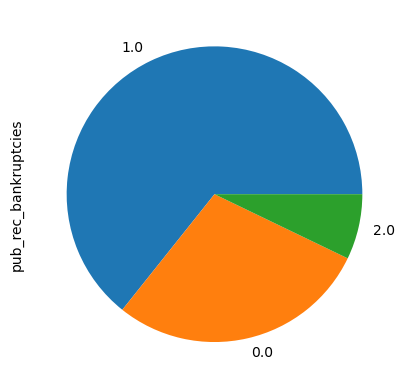

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
# Disply pie chart for Number of public record bankruptcies
inp4['pub_rec_bankruptcies'].value_counts().plot.pie()
plt.show()

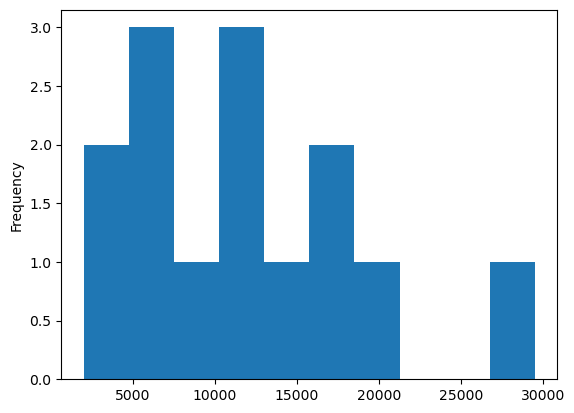

In [14]:
#Plot a histogram for funded_amnt as well.
inp4.funded_amnt.plot.hist()
plt.show()

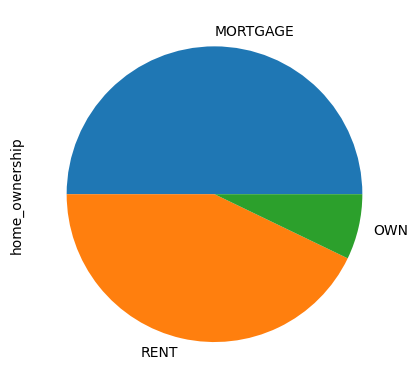

In [15]:
#A pie chart for home_ownership
inp4['home_ownership'].value_counts().plot.pie()
plt.show()

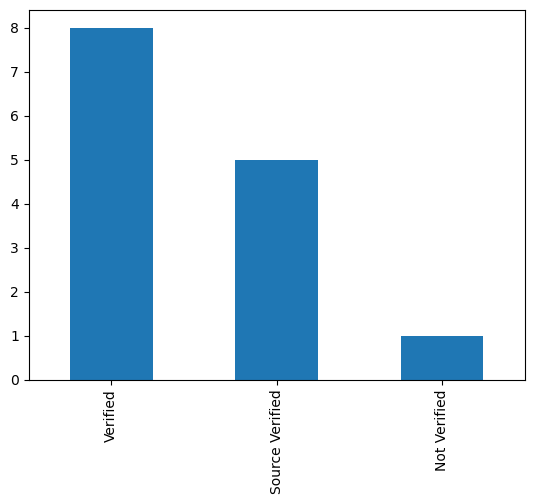

In [16]:
#A bar chart for verification_status
inp4['verification_status'].value_counts().plot.bar()
plt.show()

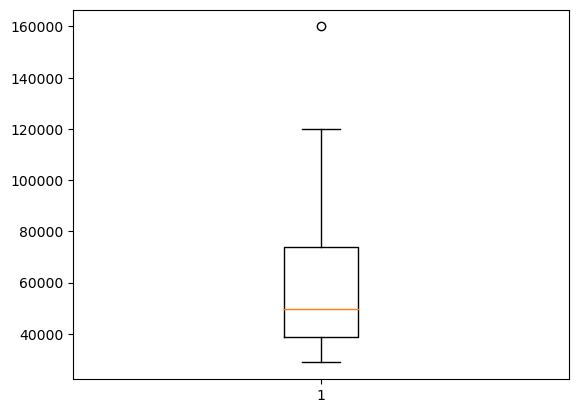

In [17]:
#Box plot for Annual Income
plt.boxplot(inp4['annual_inc'])
plt.show()

#Bivariate analysis

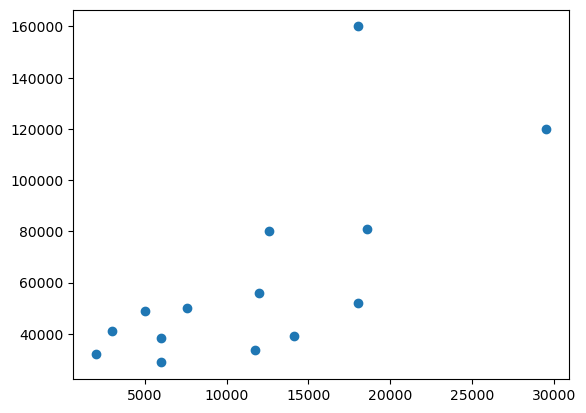

In [18]:
###funded_amnt vs annual_inc

##Plot a scatter-plot in the matplotlib way between Size and Rating
plt.scatter(inp4.funded_amnt, inp4.annual_inc)
plt.show()

<Axes: xlabel='home_ownership'>

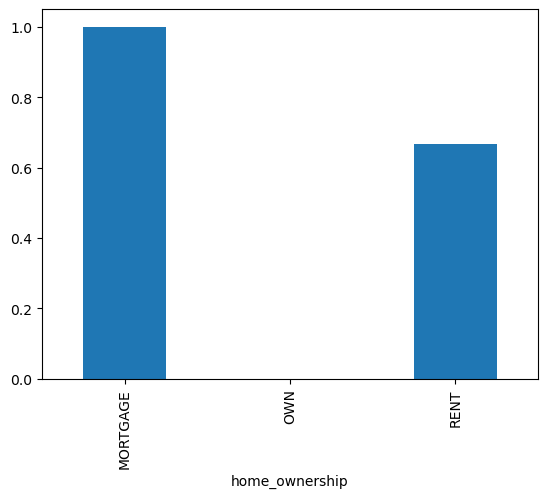

In [20]:
##a bar plot for home_ownership and pub_rec_bankruptcies and observe the trend 
inp4.groupby(['home_ownership'])['pub_rec_bankruptcies'].mean().plot.bar()

In [30]:
#code here